In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

In [2]:
data=pd.read_csv('C:\\Users\\75833\\Downloads\\Sales_add.csv')

In [3]:
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
data.shape

(22, 5)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [6]:
data.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [7]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


# 1.The company wishes to clarify whether there is any increase in sales after stepping into digital marketing. 
Hypothesis:
    
H0= There is no increase in sales after stepping into digital marketing.
    H1= There is increase in sales after stepping into digital marketing.

In [32]:
x=np.array(data['Sales_before_digital_add(in $)'])

In [34]:
y=np.array(data['Sales_After_digital_add(in $)'])

In [35]:
stat.ttest_ind(x,y,alternative='greater')

Ttest_indResult(statistic=-12.995084451110877, pvalue=0.9999999999999999)

In [37]:
#  Here, the Pvalue=0.9999999999999999 is greater than the significant level=0.05
# Hence we cannot reject the null hypothesis.
# So there is no increase in sales after stepping into digital marketing.

# 2.The company needs to check whether there is any dependency between the features“Region”and “Manager”.

Hypothesis:    
H0= There is no dependency between the features“Region”and “Manager”.

H1= There is dependency between the features“Region”and “Manager”.

In [76]:
contigency= pd.crosstab(data['Region'], data['Manager'])
contigency

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


<AxesSubplot:xlabel='Manager', ylabel='Region'>

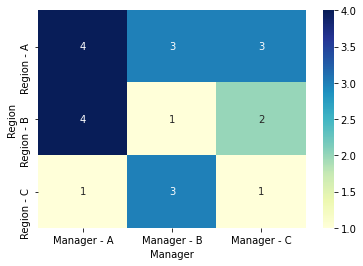

In [77]:
plt.figure
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [68]:
from scipy.stats import chi2_contingency

In [72]:
chisquare=chi2_contingency(contigency)
p

0.5493991051158094

In [78]:
#  Here, the Pvalue=0.5493991051158094 is greater than the significant level=0.05
# Hence we cannot reject the null hypothesis.
# So, there is no dependency between the features “Region”and “Manager”.